In [21]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, f1_score, precision_recall_fscore_support, classification_report, confusion_matrix, accuracy_score, mean_squared_error

In [2]:
df = pd.read_csv('../data/processed_attrition_data.csv')

X = df.drop(columns=['Attrition_Risk_Level'])
y = df['Attrition_Risk_Level']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Siap! Silakan lanjut ke blok eksperimen.")

✅ Data Siap! Silakan lanjut ke blok eksperimen.


In [5]:
list_lr = [0.04, 0.08, 0.06, 0.05, 0.009, 0.2, 0.6, 0.012, 0.01, 0.015, 0.018, 0.0111]

# 🧪 Eksperimen No. 1
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.04` (Index List: [0])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.04
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.70916133
Validation score: 0.843333
Iteration 2, loss = 0.11969508
Validation score: 0.986667
Iteration 3, loss = 0.04908414
Validation score: 0.982222
Iteration 4, loss = 0.05835952
Validation score: 0.985556
Iteration 5, loss = 0.05187167
Validation score: 0.985556
Iteration 6, loss = 0.06043196
Validation score: 0.990000
Iteration 7, loss = 0.04502440
Validation score: 0.992222
Iteration 8, loss = 0.04675031
Validation score: 0.990000
Iteration 9, loss = 0.04040123
Validation score: 0.987778
Iteration 10, loss = 0.04636425
Validation score: 0.992222
Iteration 11, loss = 0.03447659
Validation score: 0.987778
Iteration 12, loss = 0.04668265
Validation score: 0.983333
Iteration 13, loss = 0.04103553
Validation score: 0.990000
Iteration 14, loss = 0.03003203
Validation score: 0.991111
Iteration

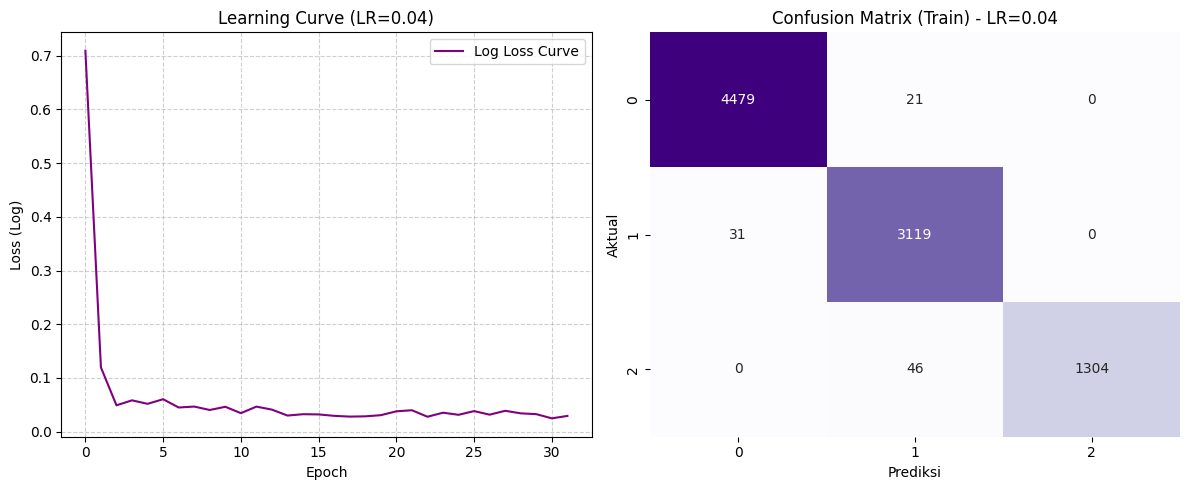


📊 HASIL AKHIR (LR=0.04):
1. Epoch Terakhir  : 32
2. Train Loss (MSE): 0.01089
3. Train Acc       : 0.9891
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4500
           1       0.98      0.99      0.98      3150
           2       1.00      0.97      0.98      1350

    accuracy                           0.99      9000
   macro avg       0.99      0.98      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [6]:
LR = list_lr[0]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 2
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.08` (Index List: [1])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.08
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.67705594
Validation score: 0.958889
Iteration 2, loss = 0.09073436
Validation score: 0.987778
Iteration 3, loss = 0.04759113
Validation score: 0.972222
Iteration 4, loss = 0.06054299
Validation score: 0.981111
Iteration 5, loss = 0.06564583
Validation score: 0.987778
Iteration 6, loss = 0.04969457
Validation score: 0.990000
Iteration 7, loss = 0.05867833
Validation score: 0.992222
Iteration 8, loss = 0.04217669
Validation score: 0.983333
Iteration 9, loss = 0.05183716
Validation score: 0.994444
Iteration 10, loss = 0.03579866
Validation score: 0.986667
Iteration 11, loss = 0.04312036
Validation score: 0.993333
Iteration 12, loss = 0.04492589
Validation score: 0.981111
Iteration 13, loss = 0.06494315
Validation score: 0.991111
Iteration 14, loss = 0.03639413
Validation score: 0.992222
Iteration

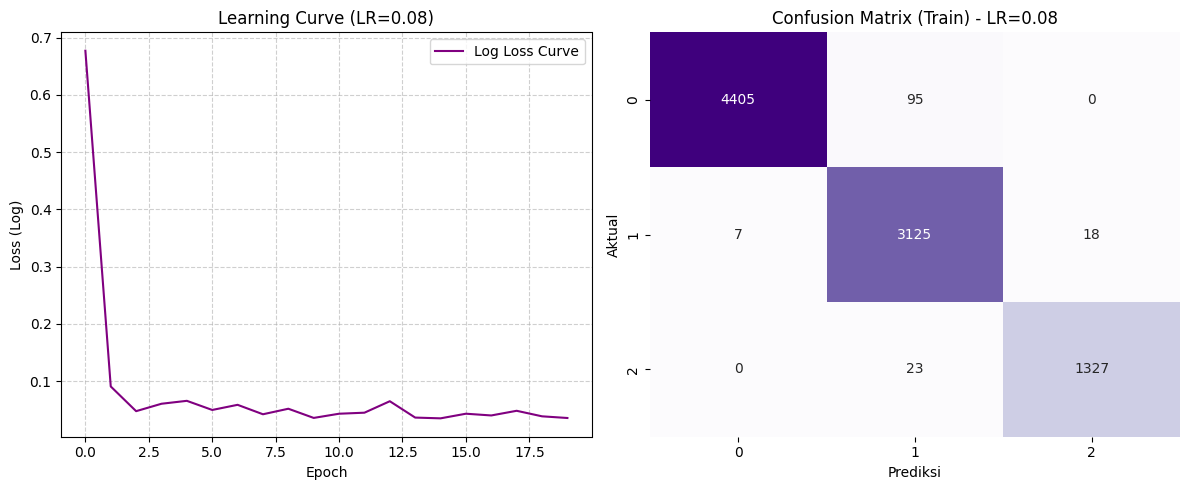


📊 HASIL AKHIR (LR=0.08):
1. Epoch Terakhir  : 20
2. Train Loss (MSE): 0.01589
3. Train Acc       : 0.9841
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4500
           1       0.96      0.99      0.98      3150
           2       0.99      0.98      0.98      1350

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



In [8]:
LR = list_lr[1]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 3
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.06` (Index List: [2])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.06
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.69862172
Validation score: 0.831111
Iteration 2, loss = 0.15232540
Validation score: 0.961111
Iteration 3, loss = 0.05688808
Validation score: 0.972222
Iteration 4, loss = 0.06818154
Validation score: 0.980000
Iteration 5, loss = 0.06846704
Validation score: 0.993333
Iteration 6, loss = 0.04425686
Validation score: 0.981111
Iteration 7, loss = 0.05129192
Validation score: 0.990000
Iteration 8, loss = 0.04293776
Validation score: 0.983333
Iteration 9, loss = 0.05620905
Validation score: 0.994444
Iteration 10, loss = 0.03173707
Validation score: 0.990000
Iteration 11, loss = 0.04136482
Validation score: 0.993333
Iteration 12, loss = 0.03776916
Validation score: 0.992222
Iteration 13, loss = 0.05543577
Validation score: 0.994444
Iteration 14, loss = 0.03277952
Validation score: 0.992222
Iteration

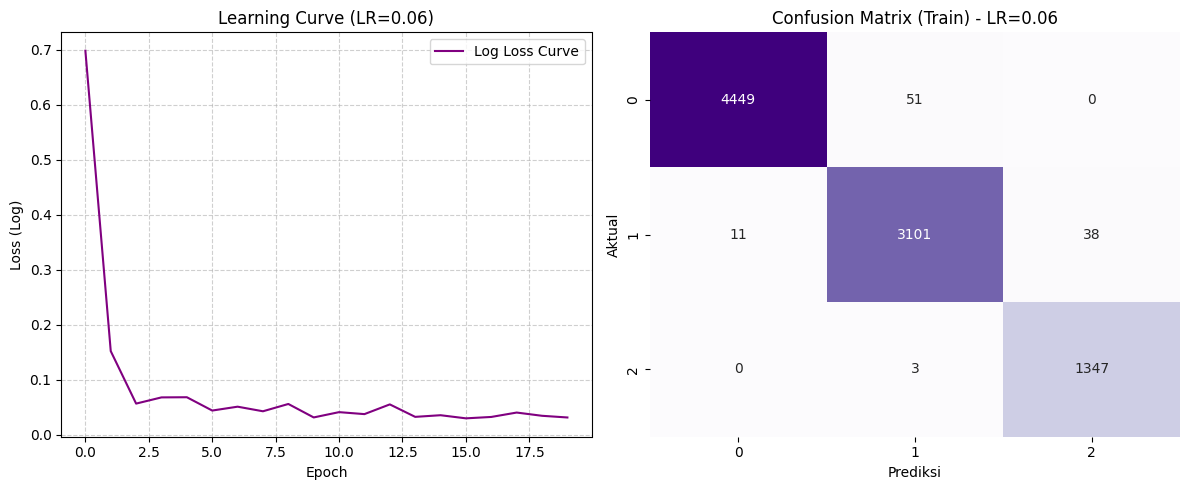


📊 HASIL AKHIR (LR=0.06):
1. Epoch Terakhir  : 20
2. Train Loss (MSE): 0.01144
3. Train Acc       : 0.9886
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4500
           1       0.98      0.98      0.98      3150
           2       0.97      1.00      0.99      1350

    accuracy                           0.99      9000
   macro avg       0.98      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [9]:
LR = list_lr[2]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 4
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.005` (Index List: [3])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.05
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.70156302
Validation score: 0.834444
Iteration 2, loss = 0.14085482
Validation score: 0.975556
Iteration 3, loss = 0.05819517
Validation score: 0.985556
Iteration 4, loss = 0.05088487
Validation score: 0.984444
Iteration 5, loss = 0.04983067
Validation score: 0.981111
Iteration 6, loss = 0.06917978
Validation score: 0.982222
Iteration 7, loss = 0.04891506
Validation score: 0.994444
Iteration 8, loss = 0.03242939
Validation score: 0.990000
Iteration 9, loss = 0.03718474
Validation score: 0.990000
Iteration 10, loss = 0.04330790
Validation score: 0.987778
Iteration 11, loss = 0.03995205
Validation score: 0.992222
Iteration 12, loss = 0.04434977
Validation score: 0.987778
Iteration 13, loss = 0.05325980
Validation score: 0.988889
Iteration 14, loss = 0.03499078
Validation score: 0.990000
Iteration

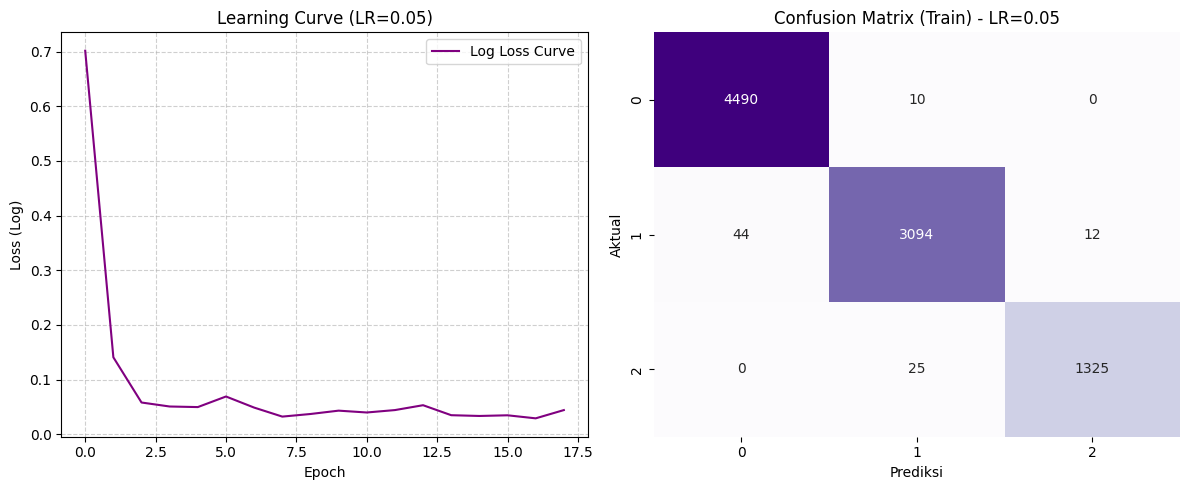


📊 HASIL AKHIR (LR=0.05):
1. Epoch Terakhir  : 18
2. Train Loss (MSE): 0.01011
3. Train Acc       : 0.9899
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4500
           1       0.99      0.98      0.99      3150
           2       0.99      0.98      0.99      1350

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [10]:
LR = list_lr[3]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 5
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.009` (Index List: [4])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.009
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.96988931
Validation score: 0.663333
Iteration 2, loss = 0.46513734
Validation score: 0.973333
Iteration 3, loss = 0.12296458
Validation score: 0.982222
Iteration 4, loss = 0.07367398
Validation score: 0.992222
Iteration 5, loss = 0.05233659
Validation score: 0.996667
Iteration 6, loss = 0.04683386
Validation score: 0.994444
Iteration 7, loss = 0.03939148
Validation score: 0.995556
Iteration 8, loss = 0.03192286
Validation score: 0.992222
Iteration 9, loss = 0.03207494
Validation score: 0.992222
Iteration 10, loss = 0.03403511
Validation score: 0.980000
Iteration 11, loss = 0.04401272
Validation score: 0.994444
Iteration 12, loss = 0.02730155
Validation score: 0.990000
Iteration 13, loss = 0.03532301
Validation score: 0.995556
Iteration 14, loss = 0.02264197
Validation score: 0.990000
Iteratio

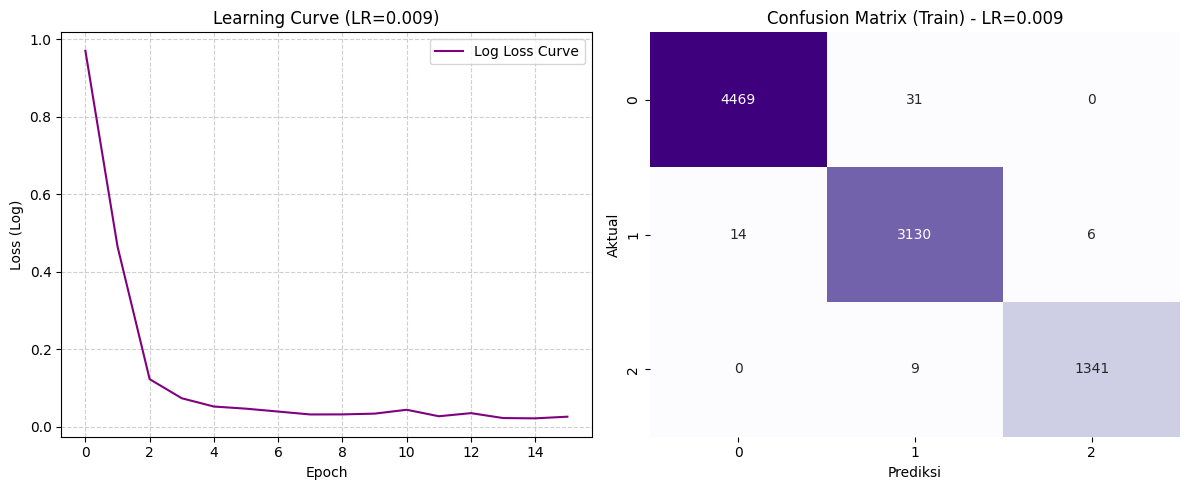


📊 HASIL AKHIR (LR=0.009):
1. Epoch Terakhir  : 16
2. Train Loss (MSE): 0.00667
3. Train Acc       : 0.9933
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4500
           1       0.99      0.99      0.99      3150
           2       1.00      0.99      0.99      1350

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [11]:
LR = list_lr[4]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 6
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.2` (Index List: [5])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.2
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 1.13951173
Validation score: 0.525556
Iteration 2, loss = 1.01902306
Validation score: 0.525556
Iteration 3, loss = 1.01108904
Validation score: 0.525556
Iteration 4, loss = 1.00587260
Validation score: 0.525556
Iteration 5, loss = 1.01119267
Validation score: 0.525556
Iteration 6, loss = 1.00993981
Validation score: 0.525556
Iteration 7, loss = 1.02485137
Validation score: 0.525556
Iteration 8, loss = 1.02643274
Validation score: 0.525556
Iteration 9, loss = 1.01038415
Validation score: 0.525556
Iteration 10, loss = 1.01447712
Validation score: 0.525556
Iteration 11, loss = 1.01618134
Validation score: 0.525556
Iteration 12, loss = 1.01956578
Validation score: 0.335556
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


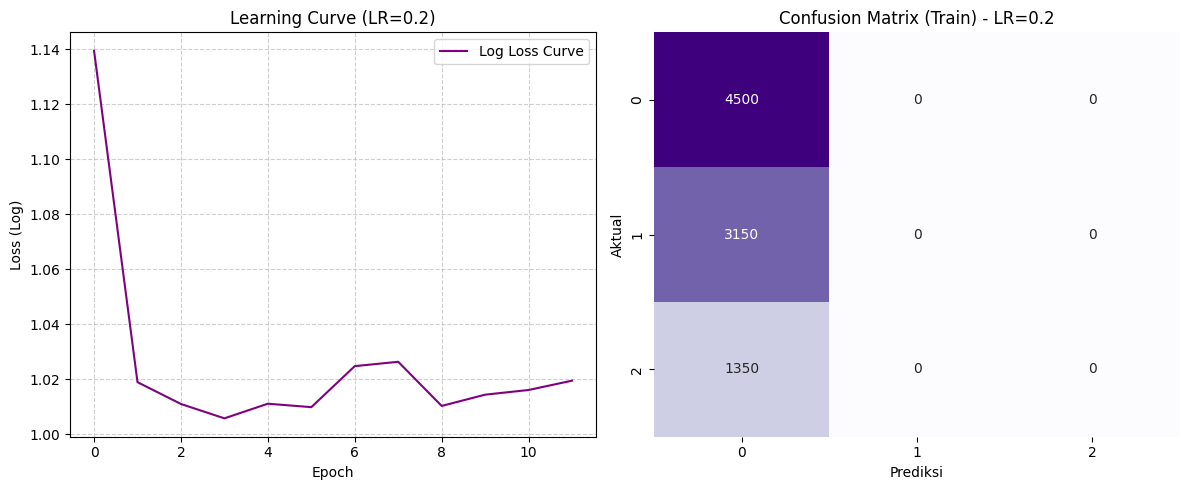


📊 HASIL AKHIR (LR=0.2):
1. Epoch Terakhir  : 12
2. Train Loss (MSE): 0.95000
3. Train Acc       : 0.5000
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4500
           1       0.00      0.00      0.00      3150
           2       0.00      0.00      0.00      1350

    accuracy                           0.50      9000
   macro avg       0.17      0.33      0.22      9000
weighted avg       0.25      0.50      0.33      9000



In [14]:
LR = list_lr[5]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 7
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.6` (Index List: [6])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.6
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 1.69385014
Validation score: 0.525556
Iteration 2, loss = 1.03333000
Validation score: 0.525556
Iteration 3, loss = 1.04842570
Validation score: 0.525556
Iteration 4, loss = 1.04398398
Validation score: 0.525556
Iteration 5, loss = 1.06315519
Validation score: 0.525556
Iteration 6, loss = 1.15994805
Validation score: 0.525556
Iteration 7, loss = 1.02216911
Validation score: 0.525556
Iteration 8, loss = 1.08684631
Validation score: 0.525556
Iteration 9, loss = 1.10625552
Validation score: 0.525556
Iteration 10, loss = 1.06945750
Validation score: 0.525556
Iteration 11, loss = 1.04178382
Validation score: 0.335556
Iteration 12, loss = 1.05303186
Validation score: 0.335556
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


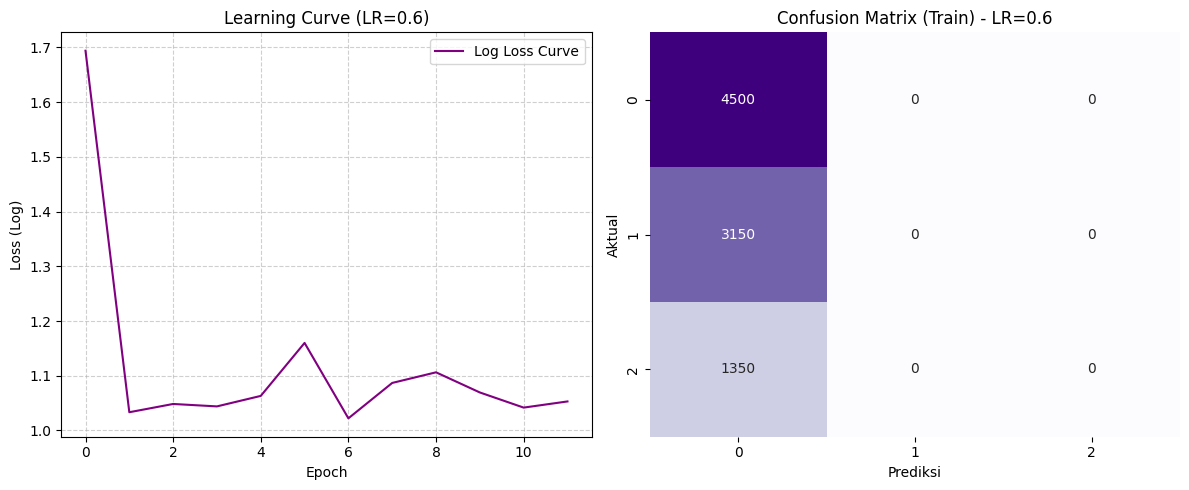


📊 HASIL AKHIR (LR=0.6):
1. Epoch Terakhir  : 12
2. Train Loss (MSE): 0.95000
3. Train Acc       : 0.5000
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4500
           1       0.00      0.00      0.00      3150
           2       0.00      0.00      0.00      1350

    accuracy                           0.50      9000
   macro avg       0.17      0.33      0.22      9000
weighted avg       0.25      0.50      0.33      9000



In [15]:
LR = list_lr[6]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 8
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.012` (Index List: [7])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.012
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.92953049
Validation score: 0.746667
Iteration 2, loss = 0.32334062
Validation score: 0.972222
Iteration 3, loss = 0.08279380
Validation score: 0.978889
Iteration 4, loss = 0.06488694
Validation score: 0.992222
Iteration 5, loss = 0.04425216
Validation score: 0.993333
Iteration 6, loss = 0.04470384
Validation score: 0.995556
Iteration 7, loss = 0.03676991
Validation score: 0.993333
Iteration 8, loss = 0.02910932
Validation score: 0.987778
Iteration 9, loss = 0.03703525
Validation score: 0.992222
Iteration 10, loss = 0.03831834
Validation score: 0.973333
Iteration 11, loss = 0.04870126
Validation score: 0.992222
Iteration 12, loss = 0.02807481
Validation score: 0.984444
Iteration 13, loss = 0.03808966
Validation score: 0.995556
Iteration 14, loss = 0.02271210
Validation score: 0.991111
Iteratio

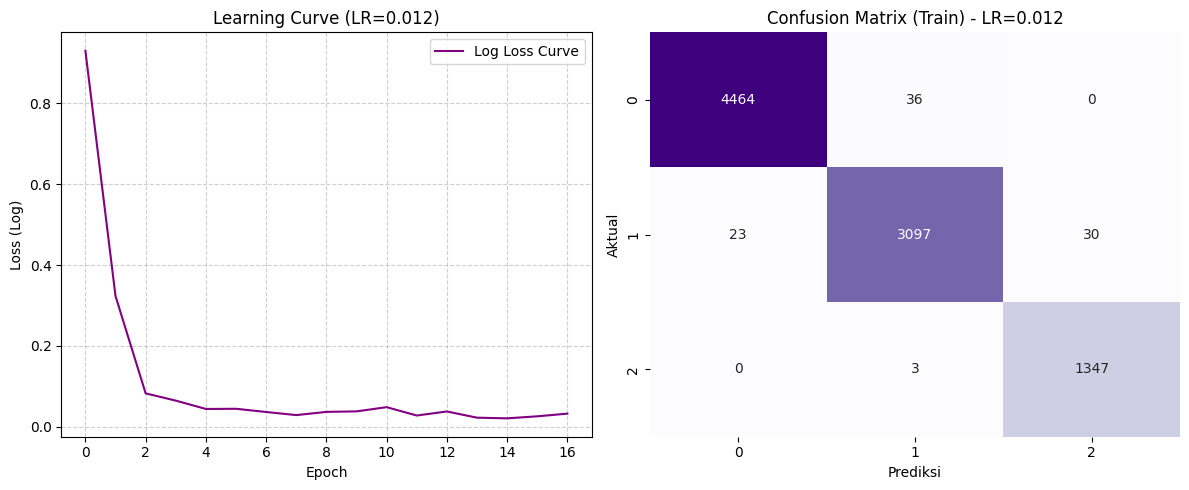


📊 HASIL AKHIR (LR=0.012):
1. Epoch Terakhir  : 17
2. Train Loss (MSE): 0.01022
3. Train Acc       : 0.9898
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4500
           1       0.99      0.98      0.99      3150
           2       0.98      1.00      0.99      1350

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [16]:
LR = list_lr[7]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 9
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.01` (Index List: [8])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.01
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.95708617
Validation score: 0.711111
Iteration 2, loss = 0.41204172
Validation score: 0.981111
Iteration 3, loss = 0.10556245
Validation score: 0.981111
Iteration 4, loss = 0.06803579
Validation score: 0.991111
Iteration 5, loss = 0.04815224
Validation score: 0.995556
Iteration 6, loss = 0.04606598
Validation score: 0.995556
Iteration 7, loss = 0.03852268
Validation score: 0.994444
Iteration 8, loss = 0.03052577
Validation score: 0.990000
Iteration 9, loss = 0.03376669
Validation score: 0.992222
Iteration 10, loss = 0.03571618
Validation score: 0.978889
Iteration 11, loss = 0.04567270
Validation score: 0.993333
Iteration 12, loss = 0.02718130
Validation score: 0.986667
Iteration 13, loss = 0.03667673
Validation score: 0.995556
Iteration 14, loss = 0.02239790
Validation score: 0.991111
Iteration

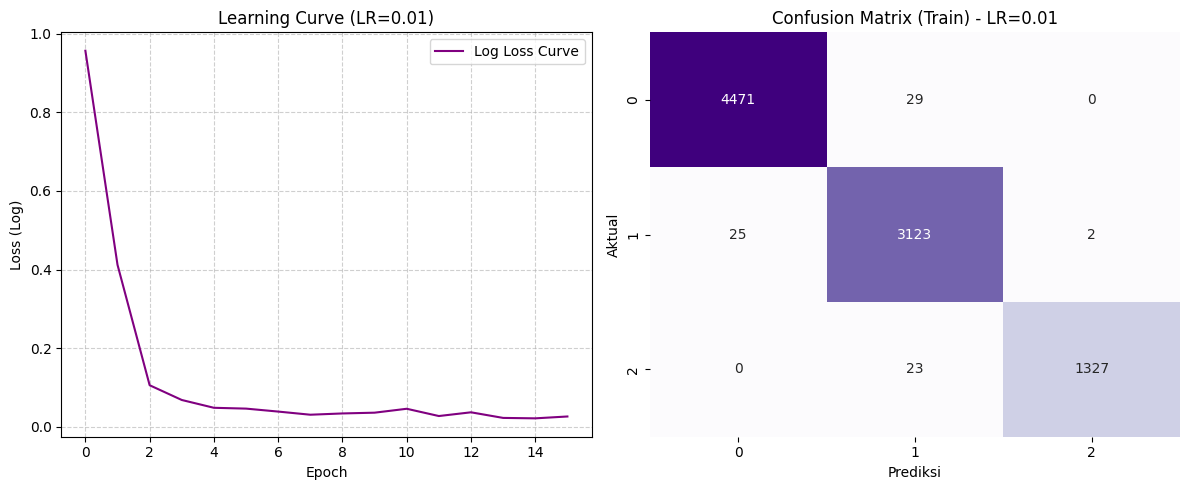


📊 HASIL AKHIR (LR=0.01):
1. Epoch Terakhir  : 16
2. Train Loss (MSE): 0.00878
3. Train Acc       : 0.9912
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4500
           1       0.98      0.99      0.99      3150
           2       1.00      0.98      0.99      1350

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [17]:
LR = list_lr[8]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 10
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.015` (Index List: [9])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.015
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.89040350
Validation score: 0.830000
Iteration 2, loss = 0.23581770
Validation score: 0.975556
Iteration 3, loss = 0.06422708
Validation score: 0.976667
Iteration 4, loss = 0.05406156
Validation score: 0.987778
Iteration 5, loss = 0.04483101
Validation score: 0.990000
Iteration 6, loss = 0.05093716
Validation score: 0.990000
Iteration 7, loss = 0.03938972
Validation score: 0.994444
Iteration 8, loss = 0.02871129
Validation score: 0.992222
Iteration 9, loss = 0.04146147
Validation score: 0.993333
Iteration 10, loss = 0.04214498
Validation score: 0.972222
Iteration 11, loss = 0.04927592
Validation score: 0.995556
Iteration 12, loss = 0.02640873
Validation score: 0.982222
Iteration 13, loss = 0.05321038
Validation score: 0.993333
Iteration 14, loss = 0.02196408
Validation score: 0.992222
Iteratio

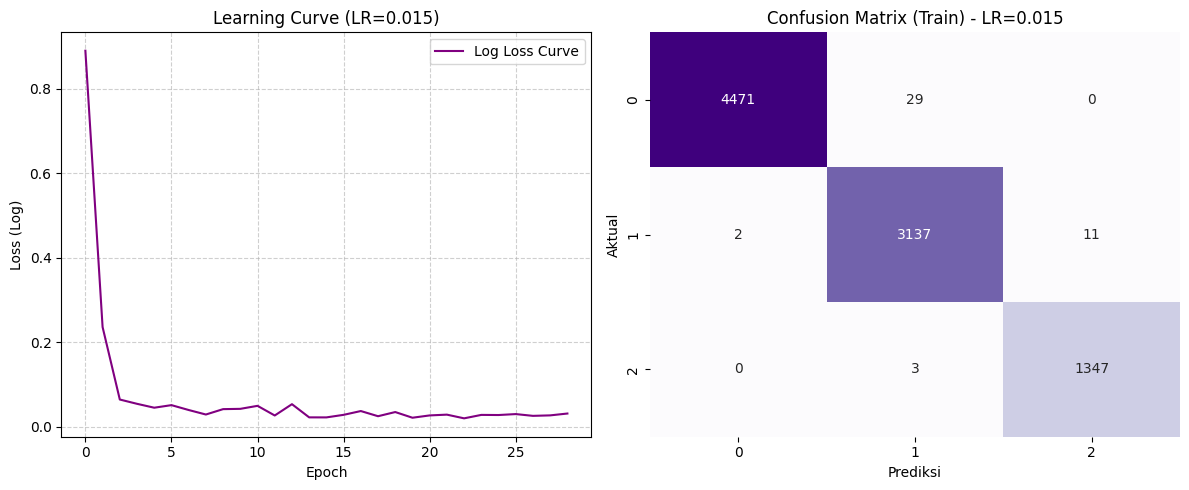


📊 HASIL AKHIR (LR=0.015):
1. Epoch Terakhir  : 29
2. Train Loss (MSE): 0.00500
3. Train Acc       : 0.9950
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4500
           1       0.99      1.00      0.99      3150
           2       0.99      1.00      0.99      1350

    accuracy                           0.99      9000
   macro avg       0.99      1.00      0.99      9000
weighted avg       1.00      0.99      1.00      9000



In [18]:
LR = list_lr[9]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 11
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.018` (Index List: [10])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.018
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.85823470
Validation score: 0.776667
Iteration 2, loss = 0.19518721
Validation score: 0.985556
Iteration 3, loss = 0.05730542
Validation score: 0.970000
Iteration 4, loss = 0.06442872
Validation score: 0.992222
Iteration 5, loss = 0.03667342
Validation score: 0.987778
Iteration 6, loss = 0.05404156
Validation score: 0.990000
Iteration 7, loss = 0.04054652
Validation score: 0.992222
Iteration 8, loss = 0.02892094
Validation score: 0.993333
Iteration 9, loss = 0.04025206
Validation score: 0.993333
Iteration 10, loss = 0.04582722
Validation score: 0.976667
Iteration 11, loss = 0.03841918
Validation score: 1.000000
Iteration 12, loss = 0.02878445
Validation score: 0.981111
Iteration 13, loss = 0.06729944
Validation score: 0.984444
Iteration 14, loss = 0.02707863
Validation score: 0.988889
Iteratio

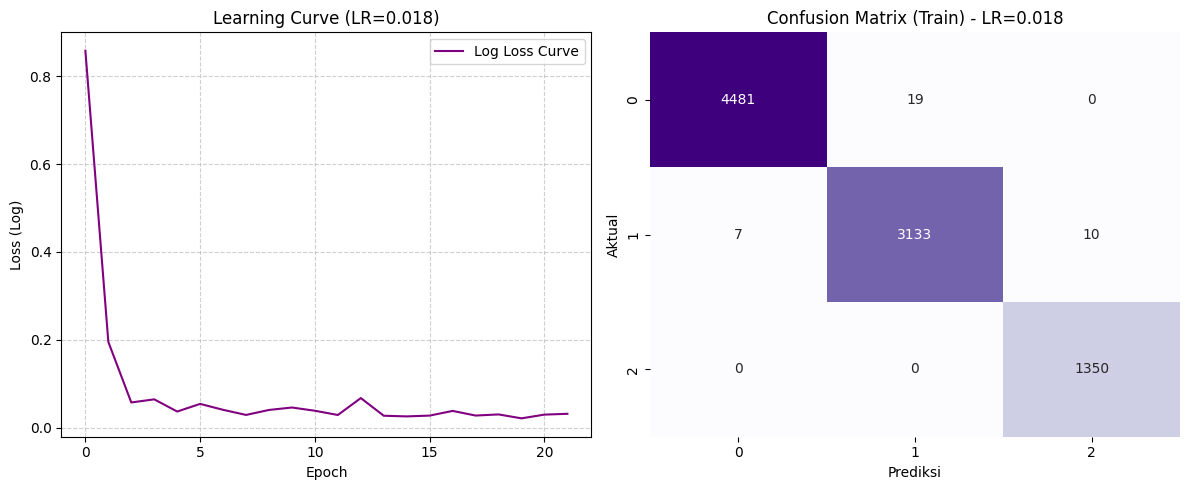


📊 HASIL AKHIR (LR=0.018):
1. Epoch Terakhir  : 22
2. Train Loss (MSE): 0.00400
3. Train Acc       : 0.9960
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4500
           1       0.99      0.99      0.99      3150
           2       0.99      1.00      1.00      1350

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [19]:
LR = list_lr[10]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 12
### **Konfigurasi 2 (Split 60% Train : 40% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.0111` (Index List: [11])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.0111
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.94202828
Validation score: 0.727778
Iteration 2, loss = 0.36177174
Validation score: 0.977778
Iteration 3, loss = 0.09168733
Validation score: 0.981111
Iteration 4, loss = 0.06440080
Validation score: 0.992222
Iteration 5, loss = 0.04506031
Validation score: 0.995556
Iteration 6, loss = 0.04518567
Validation score: 0.995556
Iteration 7, loss = 0.03773789
Validation score: 0.994444
Iteration 8, loss = 0.02950933
Validation score: 0.988889
Iteration 9, loss = 0.03559422
Validation score: 0.992222
Iteration 10, loss = 0.03699165
Validation score: 0.974444
Iteration 11, loss = 0.04708464
Validation score: 0.993333
Iteration 12, loss = 0.02722904
Validation score: 0.986667
Iteration 13, loss = 0.03774773
Validation score: 0.993333
Iteration 14, loss = 0.02239262
Validation score: 0.991111
Iterati

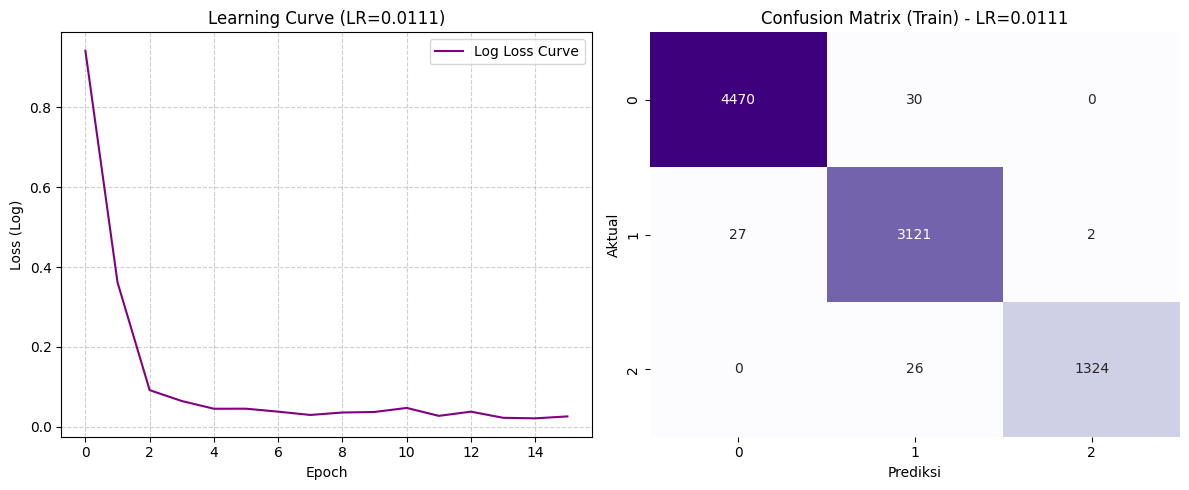


📊 HASIL AKHIR (LR=0.0111):
1. Epoch Terakhir  : 16
2. Train Loss (MSE): 0.00944
3. Train Acc       : 0.9906
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4500
           1       0.98      0.99      0.99      3150
           2       1.00      0.98      0.99      1350

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



In [20]:
LR = list_lr[11]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))